# Soccer Analytics -  Predicting Soccer Match Results to Improve Chances of Winning Bets 

In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv('CompleteFinalTrainingDataSet.csv')

In [54]:
df.shape

(550, 541)

Since we have 541 features in the dataset, most are considered to be noise it is important to get to know the main features that determine the result of a match

### Feature Selection Study using Filter and Wrapper Methods
- __Recursive Feature Elimination__
- __PCA__
- __ExtraTreeClassifier__
- __Correlation Analysis__

In [55]:
df.dropna(axis=0,inplace=True)

In [56]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [57]:
for i in range(0,len(df.columns)):
    print(df.columns[i])

season
MatchDate
Year_x
League_x
Description_x
Hteam_id
Hteam_x
Ateam_x
Ateam_id
FTR_x
HGoal diff +1_shotsF
HGoal diff +1_goalsF
HGoal diff +1_xGF
HGoal diff +1_shotsA
HGoal diff +1_goalsA
HGoal diff +1_xGA
HGoal diff +1_xGD
HGoal diff +1_xGF90
HGoal diff +1_xGA90
HGoal diff +1_timeF
HGoal diff < -1_shotsF
HGoal diff < -1_goalsF
HGoal diff < -1_xGF
HGoal diff < -1_shotsA
HGoal diff < -1_goalsA
HGoal diff < -1_xGA
HGoal diff < -1_xGD
HGoal diff < -1_xGF90
HGoal diff < -1_xGA90
HGoal diff < -1_timeF
HGoal diff > +1_shotsF
HGoal diff > +1_goalsF
HGoal diff > +1_xGF
HGoal diff > +1_shotsA
HGoal diff > +1_goalsA
HGoal diff > +1_xGA
HGoal diff > +1_xGD
HGoal diff > +1_xGF90
HGoal diff > +1_xGA90
HGoal diff > +1_timeF
HGoal diff 0_shotsF
HGoal diff 0_goalsF
HGoal diff 0_xGF
HGoal diff 0_shotsA
HGoal diff 0_goalsA
HGoal diff 0_xGA
HGoal diff 0_xGD
HGoal diff 0_xGF90
HGoal diff 0_xGA90
HGoal diff 0_timeF
HGoal diff -1_shotsF
HGoal diff -1_goalsF
HGoal diff -1_xGF
HGoal diff -1_shotsA
HGoal diff

Drop Burnley as they didn't play in Premier League in the 2015/16 season

In [58]:
idx = list(df[(df['Hteam_x']=='Burnley') |(df['Ateam_x']=='Burnley')].index)
df.drop(idx,inplace=True)

Drop all baseless fields

In [59]:
df.drop(columns=['MatchDate','Year_x'
,'League_x','Description_x'
,'Hteam_id'
,'Ateam_id'
,'Date'
,'ActualSeason_x','team_y','Hteam_x','Ateam_x','FTR_x','CalendarMonth','CalendarYear','CalendarDay','League_y','MatchDate_Number',
'Year_y'
,'Achance_x'
,'ActualSeason_y'
,'Adeep_x'
,'Agoals_x'
,'Appda_x'
,'Ashots_x'
,'Ashotstrgt_x'
,'Ateam_y'
,'AxG_x'
,'Axpts_x'
,'Dchance_x'
,'Description_y'
,'FTR'
,'Hchance_x'
,'Hdeep_x'
,'Hgoals_x'
,'Hppda_x'
,'Hshots_x'
,'Hshotstrgt_x'
,'Hteam_y'
,'HxG_x'
,'Hxpts_x'
,'HRight_Pos'
,'HRight_Team'],inplace=True)

In [60]:
for i in range(0,len(df.columns)):
    print(df.columns[i])

season
HGoal diff +1_shotsF
HGoal diff +1_goalsF
HGoal diff +1_xGF
HGoal diff +1_shotsA
HGoal diff +1_goalsA
HGoal diff +1_xGA
HGoal diff +1_xGD
HGoal diff +1_xGF90
HGoal diff +1_xGA90
HGoal diff +1_timeF
HGoal diff < -1_shotsF
HGoal diff < -1_goalsF
HGoal diff < -1_xGF
HGoal diff < -1_shotsA
HGoal diff < -1_goalsA
HGoal diff < -1_xGA
HGoal diff < -1_xGD
HGoal diff < -1_xGF90
HGoal diff < -1_xGA90
HGoal diff < -1_timeF
HGoal diff > +1_shotsF
HGoal diff > +1_goalsF
HGoal diff > +1_xGF
HGoal diff > +1_shotsA
HGoal diff > +1_goalsA
HGoal diff > +1_xGA
HGoal diff > +1_xGD
HGoal diff > +1_xGF90
HGoal diff > +1_xGA90
HGoal diff > +1_timeF
HGoal diff 0_shotsF
HGoal diff 0_goalsF
HGoal diff 0_xGF
HGoal diff 0_shotsA
HGoal diff 0_goalsA
HGoal diff 0_xGA
HGoal diff 0_xGD
HGoal diff 0_xGF90
HGoal diff 0_xGA90
HGoal diff 0_timeF
HGoal diff -1_shotsF
HGoal diff -1_goalsF
HGoal diff -1_xGF
HGoal diff -1_shotsA
HGoal diff -1_goalsA
HGoal diff -1_xGA
HGoal diff -1_xGD
HGoal diff -1_xGF90
HGoal diff -1

In [61]:
finaldf=df[['season'
,'HGoal diff +1_shotsF'
,'HGoal diff +1_goalsF'
,'HGoal diff +1_xGF'
,'HGoal diff +1_shotsA'
,'HGoal diff +1_goalsA'
,'HGoal diff +1_xGA'
,'HGoal diff +1_xGD'
,'HGoal diff +1_xGF90'
,'HGoal diff +1_xGA90'
,'HGoal diff +1_timeF'
,'HGoal diff < -1_shotsF'
,'HGoal diff < -1_goalsF'
,'HGoal diff < -1_xGF'
,'HGoal diff < -1_shotsA'
,'HGoal diff < -1_goalsA'
,'HGoal diff < -1_xGA'
,'HGoal diff < -1_xGD'
,'HGoal diff < -1_xGF90'
,'HGoal diff < -1_xGA90'
,'HGoal diff < -1_timeF'
,'HGoal diff > +1_shotsF'
,'HGoal diff > +1_goalsF'
,'HGoal diff > +1_xGF'
,'HGoal diff > +1_shotsA'
,'HGoal diff > +1_goalsA'
,'HGoal diff > +1_xGA'
,'HGoal diff > +1_xGD'
,'HGoal diff > +1_xGF90'
,'HGoal diff > +1_xGA90'
,'HGoal diff > +1_timeF'
,'HGoal diff 0_shotsF'
,'HGoal diff 0_goalsF'
,'HGoal diff 0_xGF'
,'HGoal diff 0_shotsA'
,'HGoal diff 0_goalsA'
,'HGoal diff 0_xGA'
,'HGoal diff 0_xGD'
,'HGoal diff 0_xGF90'
,'HGoal diff 0_xGA90'
,'HGoal diff 0_timeF'
,'HGoal diff -1_shotsF'
,'HGoal diff -1_goalsF'
,'HGoal diff -1_xGF'
,'HGoal diff -1_shotsA'
,'HGoal diff -1_goalsA'
,'HGoal diff -1_xGA'
,'HGoal diff -1_xGD'
,'HGoal diff -1_xGF90'
,'HGoal diff -1_xGA90'
,'HGoal diff -1_timeF'
,'HBlockedShot_shotsA'
,'HBlockedShot_shotsF'
,'HBlockedShot_xGA'
,'HBlockedShot_xGA/Sh'
,'HBlockedShot_xGD'
,'HBlockedShot_xGF'
,'HBlockedShot_xGF/Sh'
,'HGoal_shotsA'
,'HGoal_shotsF'
,'HGoal_xGA'
,'HGoal_xGA/Sh'
,'HGoal_xGD'
,'HGoal_xGF'
,'HGoal_xGF/Sh'
,'HMissedShots_shotsA'
,'HMissedShots_shotsF'
,'HMissedShots_xGA'
,'HMissedShots_xGA/Sh'
,'HMissedShots_xGD'
,'HMissedShots_xGF'
,'HMissedShots_xGF/Sh'
,'HSavedShot_shotsA'
,'HSavedShot_shotsF'
,'HSavedShot_xGA'
,'HSavedShot_xGA/Sh'
,'HSavedShot_xGD'
,'HSavedShot_xGF'
,'HSavedShot_xGF/Sh'
,'HShotOnPost_shotsA'
,'HShotOnPost_shotsF'
,'HShotOnPost_xGA'
,'HShotOnPost_xGA/Sh'
,'HShotOnPost_xGD'
,'HShotOnPost_xGF'
,'HShotOnPost_xGF/Sh'
,'HownGoals_shotsF'
,'HownGoals_goalsF'
,'HownGoals_xGF'
,'HownGoals_shotsA'
,'HownGoals_goalsA'
,'HownGoals_xGA'
,'HownGoals_xGF/Sh'
,'HownGoals_xGD'
,'HownGoals_xGA/Sh'
,'HshotOboxTotal_shotsF'
,'HshotOboxTotal_goalsF'
,'HshotOboxTotal_xGF'
,'HshotOboxTotal_shotsA'
,'HshotOboxTotal_goalsA'
,'HshotOboxTotal_xGA'
,'HshotOboxTotal_xGF/Sh'
,'HshotOboxTotal_xGD'
,'HshotOboxTotal_xGA/Sh'
,'HshotPenaltyArea_shotsF'
,'HshotPenaltyArea_goalsF'
,'HshotPenaltyArea_xGF'
,'HshotPenaltyArea_shotsA'
,'HshotPenaltyArea_goalsA'
,'HshotPenaltyArea_xGA'
,'HshotPenaltyArea_xGF/Sh'
,'HshotPenaltyArea_xGD'
,'HshotPenaltyArea_xGA/Sh'
,'HshotSixYardBox_shotsF'
,'HshotSixYardBox_goalsF'
,'HshotSixYardBox_xGF'
,'HshotSixYardBox_shotsA'
,'HshotSixYardBox_goalsA'
,'HshotSixYardBox_xGA'
,'HshotSixYardBox_xGF/Sh'
,'HshotSixYardBox_xGD'
,'HshotSixYardBox_xGA/Sh'
,'HDirectFreekick_shotsF'
,'HDirectFreekick_goalsF'
,'HDirectFreekick_xGF'
,'HDirectFreekick_shotsA'
,'HDirectFreekick_goalsA'
,'HDirectFreekick_xGA'
,'HDirectFreekick_xGD'
,'HDirectFreekick_xGF/Sh'
,'HDirectFreekick_xGA/Sh'
,'HFromCorner_shotsF'
,'HFromCorner_goalsF'
,'HFromCorner_xGF'
,'HFromCorner_shotsA'
,'HFromCorner_goalsA'
,'HFromCorner_xGA'
,'HFromCorner_xGD'
,'HFromCorner_xGF/Sh'
,'HFromCorner_xGA/Sh'
,'HOpenPlay_shotsF'
,'HOpenPlay_goalsF'
,'HOpenPlay_xGF'
,'HOpenPlay_shotsA'
,'HOpenPlay_goalsA'
,'HOpenPlay_xGA'
,'HOpenPlay_xGD'
,'HOpenPlay_xGF/Sh'
,'HOpenPlay_xGA/Sh'
,'HPenalty_shotsF'
,'HPenalty_goalsF'
,'HPenalty_xGF'
,'HPenalty_shotsA'
,'HPenalty_goalsA'
,'HPenalty_xGA'
,'HPenalty_xGD'
,'HPenalty_xGF/Sh'
,'HPenalty_xGA/Sh'
,'HSetPiece_shotsF'
,'HSetPiece_goalsF'
,'HSetPiece_xGF'
,'HSetPiece_shotsA'
,'HSetPiece_goalsA'
,'HSetPiece_xGA'
,'HSetPiece_xGD'
,'HSetPiece_xGF/Sh'
,'HSetPiece_xGA/Sh'
,'H0-15_shotsF'
,'H0-15_goalsF'
,'H0-15_xGF'
,'H0-15_shotsA'
,'H0-15_goalsA'
,'H0-15_xGA'
,'H0-15_xGD'
,'H0-15_xGF/Sh'
,'H0-15_xGA/Sh'
,'H16-30_shotsF'
,'H16-30_goalsF'
,'H16-30_xGF'
,'H16-30_shotsA'
,'H16-30_goalsA'
,'H16-30_xGA'
,'H16-30_xGD'
,'H16-30_xGF/Sh'
,'H16-30_xGA/Sh'
,'H31-45_shotsF'
,'H31-45_goalsF'
,'H31-45_xGF'
,'H31-45_shotsA'
,'H31-45_goalsA'
,'H31-45_xGA'
,'H31-45_xGD'
,'H31-45_xGF/Sh'
,'H31-45_xGA/Sh'
,'H46-60_shotsF'
,'H46-60_goalsF'
,'H46-60_xGF'
,'H46-60_shotsA'
,'H46-60_goalsA'
,'H46-60_xGA'
,'H46-60_xGD'
,'H46-60_xGF/Sh'
,'H46-60_xGA/Sh'
,'H61-75_shotsF'
,'H61-75_goalsF'
,'H61-75_xGF'
,'H61-75_shotsA'
,'H61-75_goalsA'
,'H61-75_xGA'
,'H61-75_xGD'
,'H61-75_xGF/Sh'
,'H61-75_xGA/Sh'
,'H76+_shotsF'
,'H76+_goalsF'
,'H76+_xGF'
,'H76+_shotsA'
,'H76+_goalsA'
,'H76+_xGA'
,'H76+_xGD'
,'H76+_xGF/Sh'
,'H76+_xGA/Sh'
,'AGoal diff +1_shotsF'
,'AGoal diff +1_goalsF'
,'AGoal diff +1_xGF'
,'AGoal diff +1_shotsA'
,'AGoal diff +1_goalsA'
,'AGoal diff +1_xGA'
,'AGoal diff +1_xGD'
,'AGoal diff +1_xGF90'
,'AGoal diff +1_xGA90'
,'AGoal diff +1_timeF'
,'AGoal diff < -1_shotsF'
,'AGoal diff < -1_goalsF'
,'AGoal diff < -1_xGF'
,'AGoal diff < -1_shotsA'
,'AGoal diff < -1_goalsA'
,'AGoal diff < -1_xGA'
,'AGoal diff < -1_xGD'
,'AGoal diff < -1_xGF90'
,'AGoal diff < -1_xGA90'
,'AGoal diff < -1_timeF'
,'AGoal diff > +1_shotsF'
,'AGoal diff > +1_goalsF'
,'AGoal diff > +1_xGF'
,'AGoal diff > +1_shotsA'
,'AGoal diff > +1_goalsA'
,'AGoal diff > +1_xGA'
,'AGoal diff > +1_xGD'
,'AGoal diff > +1_xGF90'
,'AGoal diff > +1_xGA90'
,'AGoal diff > +1_timeF'
,'AGoal diff 0_shotsF'
,'AGoal diff 0_goalsF'
,'AGoal diff 0_xGF'
,'AGoal diff 0_shotsA'
,'AGoal diff 0_goalsA'
,'AGoal diff 0_xGA'
,'AGoal diff 0_xGD'
,'AGoal diff 0_xGF90'
,'AGoal diff 0_xGA90'
,'AGoal diff 0_timeF'
,'AGoal diff -1_shotsF'
,'AGoal diff -1_goalsF'
,'AGoal diff -1_xGF'
,'AGoal diff -1_shotsA'
,'AGoal diff -1_goalsA'
,'AGoal diff -1_xGA'
,'AGoal diff -1_xGD'
,'AGoal diff -1_xGF90'
,'AGoal diff -1_xGA90'
,'AGoal diff -1_timeF'
,'ABlockedShot_shotsA'
,'ABlockedShot_shotsF'
,'ABlockedShot_xGA'
,'ABlockedShot_xGA/Sh'
,'ABlockedShot_xGD'
,'ABlockedShot_xGF'
,'ABlockedShot_xGF/Sh'
,'AGoal_shotsA'
,'AGoal_shotsF'
,'AGoal_xGA'
,'AGoal_xGA/Sh'
,'AGoal_xGD'
,'AGoal_xGF'
,'AGoal_xGF/Sh'
,'AMissedShots_shotsA'
,'AMissedShots_shotsF'
,'AMissedShots_xGA'
,'AMissedShots_xGA/Sh'
,'AMissedShots_xGD'
,'AMissedShots_xGF'
,'AMissedShots_xGF/Sh'
,'ASavedShot_shotsA'
,'ASavedShot_shotsF'
,'ASavedShot_xGA'
,'ASavedShot_xGA/Sh'
,'ASavedShot_xGD'
,'ASavedShot_xGF'
,'ASavedShot_xGF/Sh'
,'AShotOnPost_shotsA'
,'AShotOnPost_shotsF'
,'AShotOnPost_xGA'
,'AShotOnPost_xGA/Sh'
,'AShotOnPost_xGD'
,'AShotOnPost_xGF'
,'AShotOnPost_xGF/Sh'
,'AownGoals_shotsF'
,'AownGoals_goalsF'
,'AownGoals_xGF'
,'AownGoals_shotsA'
,'AownGoals_goalsA'
,'AownGoals_xGA'
,'AownGoals_xGF/Sh'
,'AownGoals_xGD'
,'AownGoals_xGA/Sh'
,'AshotOboxTotal_shotsF'
,'AshotOboxTotal_goalsF'
,'AshotOboxTotal_xGF'
,'AshotOboxTotal_shotsA'
,'AshotOboxTotal_goalsA'
,'AshotOboxTotal_xGA'
,'AshotOboxTotal_xGF/Sh'
,'AshotOboxTotal_xGD'
,'AshotOboxTotal_xGA/Sh'
,'AshotPenaltyArea_shotsF'
,'AshotPenaltyArea_goalsF'
,'AshotPenaltyArea_xGF'
,'AshotPenaltyArea_shotsA'
,'AshotPenaltyArea_goalsA'
,'AshotPenaltyArea_xGA'
,'AshotPenaltyArea_xGF/Sh'
,'AshotPenaltyArea_xGD'
,'AshotPenaltyArea_xGA/Sh'
,'AshotSixYardBox_shotsF'
,'AshotSixYardBox_goalsF'
,'AshotSixYardBox_xGF'
,'AshotSixYardBox_shotsA'
,'AshotSixYardBox_goalsA'
,'AshotSixYardBox_xGA'
,'AshotSixYardBox_xGF/Sh'
,'AshotSixYardBox_xGD'
,'AshotSixYardBox_xGA/Sh'
,'ADirectFreekick_shotsF'
,'ADirectFreekick_goalsF'
,'ADirectFreekick_xGF'
,'ADirectFreekick_shotsA'
,'ADirectFreekick_goalsA'
,'ADirectFreekick_xGA'
,'ADirectFreekick_xGD'
,'ADirectFreekick_xGF/Sh'
,'ADirectFreekick_xGA/Sh'
,'AFromCorner_shotsF'
,'AFromCorner_goalsF'
,'AFromCorner_xGF'
,'AFromCorner_shotsA'
,'AFromCorner_goalsA'
,'AFromCorner_xGA'
,'AFromCorner_xGD'
,'AFromCorner_xGF/Sh'
,'AFromCorner_xGA/Sh'
,'AOpenPlay_shotsF'
,'AOpenPlay_goalsF'
,'AOpenPlay_xGF'
,'AOpenPlay_shotsA'
,'AOpenPlay_goalsA'
,'AOpenPlay_xGA'
,'AOpenPlay_xGD'
,'AOpenPlay_xGF/Sh'
,'AOpenPlay_xGA/Sh'
,'APenalty_shotsF'
,'APenalty_goalsF'
,'APenalty_xGF'
,'APenalty_shotsA'
,'APenalty_goalsA'
,'APenalty_xGA'
,'APenalty_xGD'
,'APenalty_xGF/Sh'
,'APenalty_xGA/Sh'
,'ASetPiece_shotsF'
,'ASetPiece_goalsF'
,'ASetPiece_xGF'
,'ASetPiece_shotsA'
,'ASetPiece_goalsA'
,'ASetPiece_xGA'
,'ASetPiece_xGD'
,'ASetPiece_xGF/Sh'
,'ASetPiece_xGA/Sh'
,'A0-15_shotsF'
,'A0-15_goalsF'
,'A0-15_xGF'
,'A0-15_shotsA'
,'A0-15_goalsA'
,'A0-15_xGA'
,'A0-15_xGD'
,'A0-15_xGF/Sh'
,'A0-15_xGA/Sh'
,'A16-30_shotsF'
,'A16-30_goalsF'
,'A16-30_xGF'
,'A16-30_shotsA'
,'A16-30_goalsA'
,'A16-30_xGA'
,'A16-30_xGD'
,'A16-30_xGF/Sh'
,'A16-30_xGA/Sh'
,'A31-45_shotsF'
,'A31-45_goalsF'
,'A31-45_xGF'
,'A31-45_shotsA'
,'A31-45_goalsA'
,'A31-45_xGA'
,'A31-45_xGD'
,'A31-45_xGF/Sh'
,'A31-45_xGA/Sh'
,'A46-60_shotsF'
,'A46-60_goalsF'
,'A46-60_xGF'
,'A46-60_shotsA'
,'A46-60_goalsA'
,'A46-60_xGA'
,'A46-60_xGD'
,'A46-60_xGF/Sh'
,'A46-60_xGA/Sh'
,'A61-75_shotsF'
,'A61-75_goalsF'
,'A61-75_xGF'
,'A61-75_shotsA'
,'A61-75_goalsA'
,'A61-75_xGA'
,'A61-75_xGD'
,'A61-75_xGF/Sh'
,'A61-75_xGA/Sh'
,'A76+_shotsF'
,'A76+_goalsF'
,'A76+_xGF'
,'A76+_shotsA'
,'A76+_goalsA'
,'A76+_xGA'
,'A76+_xGD'
,'A76+_xGF/Sh'
,'A76+_xGA/Sh'
,'HomeTeam'
,'AwayTeam'
,'FTR_y'
,'HW'
,'HD'
,'HL'
,'HGF'
,'HGA'
,'HGD'
,'HPts'
,'HAvg_Finish'
,'HPY_finish_flag'
,'HRight_W'
,'HRight_D'
,'HRight_L'
,'HRight_GF'
,'HRight_GA'
,'HRight_GD'
,'HRight_Pts'
,'HRight_Avg_Finish'
,'HRight_PY_finish_flag'
,'HKey_Players'
,'AKey_Players'
,'L2LY_Achance'
,'L2LY_Adeep'
,'L2LY_Agoals'
,'L2LY_Appda'
,'L2LY_Ashots'
,'L2LY_Ashotstrgt'
,'L2LY_AxG'
,'L2LY_Axpts'
,'L2LY_Dchance'
,'L2LY_Hchance'
,'L2LY_Hdeep'
,'L2LY_Hgoals'
,'L2LY_Hppda'
,'L2LY_Hshots'
,'L2LY_Hshotstrgt'
,'L2LY_HxG'
,'L2LY_Hxpts'
,'LY_Achance_y'
,'LY_Adeep_y'
,'LY_Agoals_y'
,'LY_Appda_y'
,'LY_Ashots_y'
,'LY_Ashotstrgt_y'
,'LY_AxG_y'
,'LY_Axpts_y'
,'LY_Dchance_y'
,'LY_Hchance_y'
,'LY_Hdeep_y'
,'LY_Hgoals_y'
,'LY_Hppda_y'
,'LY_Hshots_y'
,'LY_Hshotstrgt_y'
,'LY_HxG_y'
,'LY_Hxpts_y']]

In [62]:
finaldf.to_csv('trainingdatasetcomplete.csv')

__1. Split into Training and Test Dataset__

In [65]:
trainingdf = finaldf[(finaldf['season']==2016) | (finaldf['season']==2017)]
testdf= finaldf[(finaldf['season']==2018)]

In [66]:
testdf.season.unique()

array([2018.])

In [67]:
trainingdf['FTR_y'] = trainingdf.FTR_y.apply(lambda x: 0 if x=='D'else( 1 if x=='H' else 2))
testdf['FTR_y'] = testdf.FTR_y.apply(lambda x: 0 if x=='D'else( 1 if x=='H' else 2))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Get Dummies for all the categorical fields

In [68]:
finaltrainingdf = pd.get_dummies(trainingdf,prefix=['Hteam','Ateam'],columns=['HomeTeam','AwayTeam'])
finaltestdf = pd.get_dummies(testdf,prefix=['Hteam','Ateam'],columns=['HomeTeam','AwayTeam'])

In [69]:
finaltrainingdf.drop(columns=['season'],inplace=True)
finaltestdf.drop(columns=['season'],inplace=True)

In [71]:
finaltrainingdf=finaltrainingdf[['HGoal diff +1_shotsF'
,'HGoal diff +1_goalsF'
,'HGoal diff +1_xGF'
,'HGoal diff +1_shotsA'
,'HGoal diff +1_goalsA'
,'HGoal diff +1_xGA'
,'HGoal diff +1_xGD'
,'HGoal diff +1_xGF90'
,'HGoal diff +1_xGA90'
,'HGoal diff +1_timeF'
,'HGoal diff < -1_shotsF'
,'HGoal diff < -1_goalsF'
,'HGoal diff < -1_xGF'
,'HGoal diff < -1_shotsA'
,'HGoal diff < -1_goalsA'
,'HGoal diff < -1_xGA'
,'HGoal diff < -1_xGD'
,'HGoal diff < -1_xGF90'
,'HGoal diff < -1_xGA90'
,'HGoal diff < -1_timeF'
,'HGoal diff > +1_shotsF'
,'HGoal diff > +1_goalsF'
,'HGoal diff > +1_xGF'
,'HGoal diff > +1_shotsA'
,'HGoal diff > +1_goalsA'
,'HGoal diff > +1_xGA'
,'HGoal diff > +1_xGD'
,'HGoal diff > +1_xGF90'
,'HGoal diff > +1_xGA90'
,'HGoal diff > +1_timeF'
,'HGoal diff 0_shotsF'
,'HGoal diff 0_goalsF'
,'HGoal diff 0_xGF'
,'HGoal diff 0_shotsA'
,'HGoal diff 0_goalsA'
,'HGoal diff 0_xGA'
,'HGoal diff 0_xGD'
,'HGoal diff 0_xGF90'
,'HGoal diff 0_xGA90'
,'HGoal diff 0_timeF'
,'HGoal diff -1_shotsF'
,'HGoal diff -1_goalsF'
,'HGoal diff -1_xGF'
,'HGoal diff -1_shotsA'
,'HGoal diff -1_goalsA'
,'HGoal diff -1_xGA'
,'HGoal diff -1_xGD'
,'HGoal diff -1_xGF90'
,'HGoal diff -1_xGA90'
,'HGoal diff -1_timeF'
,'HBlockedShot_shotsA'
,'HBlockedShot_shotsF'
,'HBlockedShot_xGA'
,'HBlockedShot_xGA/Sh'
,'HBlockedShot_xGD'
,'HBlockedShot_xGF'
,'HBlockedShot_xGF/Sh'
,'HGoal_shotsA'
,'HGoal_shotsF'
,'HGoal_xGA'
,'HGoal_xGA/Sh'
,'HGoal_xGD'
,'HGoal_xGF'
,'HGoal_xGF/Sh'
,'HMissedShots_shotsA'
,'HMissedShots_shotsF'
,'HMissedShots_xGA'
,'HMissedShots_xGA/Sh'
,'HMissedShots_xGD'
,'HMissedShots_xGF'
,'HMissedShots_xGF/Sh'
,'HSavedShot_shotsA'
,'HSavedShot_shotsF'
,'HSavedShot_xGA'
,'HSavedShot_xGA/Sh'
,'HSavedShot_xGD'
,'HSavedShot_xGF'
,'HSavedShot_xGF/Sh'
,'HShotOnPost_shotsA'
,'HShotOnPost_shotsF'
,'HShotOnPost_xGA'
,'HShotOnPost_xGA/Sh'
,'HShotOnPost_xGD'
,'HShotOnPost_xGF'
,'HShotOnPost_xGF/Sh'
,'HownGoals_shotsF'
,'HownGoals_goalsF'
,'HownGoals_xGF'
,'HownGoals_shotsA'
,'HownGoals_goalsA'
,'HownGoals_xGA'
,'HownGoals_xGF/Sh'
,'HownGoals_xGD'
,'HownGoals_xGA/Sh'
,'HshotOboxTotal_shotsF'
,'HshotOboxTotal_goalsF'
,'HshotOboxTotal_xGF'
,'HshotOboxTotal_shotsA'
,'HshotOboxTotal_goalsA'
,'HshotOboxTotal_xGA'
,'HshotOboxTotal_xGF/Sh'
,'HshotOboxTotal_xGD'
,'HshotOboxTotal_xGA/Sh'
,'HshotPenaltyArea_shotsF'
,'HshotPenaltyArea_goalsF'
,'HshotPenaltyArea_xGF'
,'HshotPenaltyArea_shotsA'
,'HshotPenaltyArea_goalsA'
,'HshotPenaltyArea_xGA'
,'HshotPenaltyArea_xGF/Sh'
,'HshotPenaltyArea_xGD'
,'HshotPenaltyArea_xGA/Sh'
,'HshotSixYardBox_shotsF'
,'HshotSixYardBox_goalsF'
,'HshotSixYardBox_xGF'
,'HshotSixYardBox_shotsA'
,'HshotSixYardBox_goalsA'
,'HshotSixYardBox_xGA'
,'HshotSixYardBox_xGF/Sh'
,'HshotSixYardBox_xGD'
,'HshotSixYardBox_xGA/Sh'
,'HDirectFreekick_shotsF'
,'HDirectFreekick_goalsF'
,'HDirectFreekick_xGF'
,'HDirectFreekick_shotsA'
,'HDirectFreekick_goalsA'
,'HDirectFreekick_xGA'
,'HDirectFreekick_xGD'
,'HDirectFreekick_xGF/Sh'
,'HDirectFreekick_xGA/Sh'
,'HFromCorner_shotsF'
,'HFromCorner_goalsF'
,'HFromCorner_xGF'
,'HFromCorner_shotsA'
,'HFromCorner_goalsA'
,'HFromCorner_xGA'
,'HFromCorner_xGD'
,'HFromCorner_xGF/Sh'
,'HFromCorner_xGA/Sh'
,'HOpenPlay_shotsF'
,'HOpenPlay_goalsF'
,'HOpenPlay_xGF'
,'HOpenPlay_shotsA'
,'HOpenPlay_goalsA'
,'HOpenPlay_xGA'
,'HOpenPlay_xGD'
,'HOpenPlay_xGF/Sh'
,'HOpenPlay_xGA/Sh'
,'HPenalty_shotsF'
,'HPenalty_goalsF'
,'HPenalty_xGF'
,'HPenalty_shotsA'
,'HPenalty_goalsA'
,'HPenalty_xGA'
,'HPenalty_xGD'
,'HPenalty_xGF/Sh'
,'HPenalty_xGA/Sh'
,'HSetPiece_shotsF'
,'HSetPiece_goalsF'
,'HSetPiece_xGF'
,'HSetPiece_shotsA'
,'HSetPiece_goalsA'
,'HSetPiece_xGA'
,'HSetPiece_xGD'
,'HSetPiece_xGF/Sh'
,'HSetPiece_xGA/Sh'
,'H0-15_shotsF'
,'H0-15_goalsF'
,'H0-15_xGF'
,'H0-15_shotsA'
,'H0-15_goalsA'
,'H0-15_xGA'
,'H0-15_xGD'
,'H0-15_xGF/Sh'
,'H0-15_xGA/Sh'
,'H16-30_shotsF'
,'H16-30_goalsF'
,'H16-30_xGF'
,'H16-30_shotsA'
,'H16-30_goalsA'
,'H16-30_xGA'
,'H16-30_xGD'
,'H16-30_xGF/Sh'
,'H16-30_xGA/Sh'
,'H31-45_shotsF'
,'H31-45_goalsF'
,'H31-45_xGF'
,'H31-45_shotsA'
,'H31-45_goalsA'
,'H31-45_xGA'
,'H31-45_xGD'
,'H31-45_xGF/Sh'
,'H31-45_xGA/Sh'
,'H46-60_shotsF'
,'H46-60_goalsF'
,'H46-60_xGF'
,'H46-60_shotsA'
,'H46-60_goalsA'
,'H46-60_xGA'
,'H46-60_xGD'
,'H46-60_xGF/Sh'
,'H46-60_xGA/Sh'
,'H61-75_shotsF'
,'H61-75_goalsF'
,'H61-75_xGF'
,'H61-75_shotsA'
,'H61-75_goalsA'
,'H61-75_xGA'
,'H61-75_xGD'
,'H61-75_xGF/Sh'
,'H61-75_xGA/Sh'
,'H76+_shotsF'
,'H76+_goalsF'
,'H76+_xGF'
,'H76+_shotsA'
,'H76+_goalsA'
,'H76+_xGA'
,'H76+_xGD'
,'H76+_xGF/Sh'
,'H76+_xGA/Sh'
,'AGoal diff +1_shotsF'
,'AGoal diff +1_goalsF'
,'AGoal diff +1_xGF'
,'AGoal diff +1_shotsA'
,'AGoal diff +1_goalsA'
,'AGoal diff +1_xGA'
,'AGoal diff +1_xGD'
,'AGoal diff +1_xGF90'
,'AGoal diff +1_xGA90'
,'AGoal diff +1_timeF'
,'AGoal diff < -1_shotsF'
,'AGoal diff < -1_goalsF'
,'AGoal diff < -1_xGF'
,'AGoal diff < -1_shotsA'
,'AGoal diff < -1_goalsA'
,'AGoal diff < -1_xGA'
,'AGoal diff < -1_xGD'
,'AGoal diff < -1_xGF90'
,'AGoal diff < -1_xGA90'
,'AGoal diff < -1_timeF'
,'AGoal diff > +1_shotsF'
,'AGoal diff > +1_goalsF'
,'AGoal diff > +1_xGF'
,'AGoal diff > +1_shotsA'
,'AGoal diff > +1_goalsA'
,'AGoal diff > +1_xGA'
,'AGoal diff > +1_xGD'
,'AGoal diff > +1_xGF90'
,'AGoal diff > +1_xGA90'
,'AGoal diff > +1_timeF'
,'AGoal diff 0_shotsF'
,'AGoal diff 0_goalsF'
,'AGoal diff 0_xGF'
,'AGoal diff 0_shotsA'
,'AGoal diff 0_goalsA'
,'AGoal diff 0_xGA'
,'AGoal diff 0_xGD'
,'AGoal diff 0_xGF90'
,'AGoal diff 0_xGA90'
,'AGoal diff 0_timeF'
,'AGoal diff -1_shotsF'
,'AGoal diff -1_goalsF'
,'AGoal diff -1_xGF'
,'AGoal diff -1_shotsA'
,'AGoal diff -1_goalsA'
,'AGoal diff -1_xGA'
,'AGoal diff -1_xGD'
,'AGoal diff -1_xGF90'
,'AGoal diff -1_xGA90'
,'AGoal diff -1_timeF'
,'ABlockedShot_shotsA'
,'ABlockedShot_shotsF'
,'ABlockedShot_xGA'
,'ABlockedShot_xGA/Sh'
,'ABlockedShot_xGD'
,'ABlockedShot_xGF'
,'ABlockedShot_xGF/Sh'
,'AGoal_shotsA'
,'AGoal_shotsF'
,'AGoal_xGA'
,'AGoal_xGA/Sh'
,'AGoal_xGD'
,'AGoal_xGF'
,'AGoal_xGF/Sh'
,'AMissedShots_shotsA'
,'AMissedShots_shotsF'
,'AMissedShots_xGA'
,'AMissedShots_xGA/Sh'
,'AMissedShots_xGD'
,'AMissedShots_xGF'
,'AMissedShots_xGF/Sh'
,'ASavedShot_shotsA'
,'ASavedShot_shotsF'
,'ASavedShot_xGA'
,'ASavedShot_xGA/Sh'
,'ASavedShot_xGD'
,'ASavedShot_xGF'
,'ASavedShot_xGF/Sh'
,'AShotOnPost_shotsA'
,'AShotOnPost_shotsF'
,'AShotOnPost_xGA'
,'AShotOnPost_xGA/Sh'
,'AShotOnPost_xGD'
,'AShotOnPost_xGF'
,'AShotOnPost_xGF/Sh'
,'AownGoals_shotsF'
,'AownGoals_goalsF'
,'AownGoals_xGF'
,'AownGoals_shotsA'
,'AownGoals_goalsA'
,'AownGoals_xGA'
,'AownGoals_xGF/Sh'
,'AownGoals_xGD'
,'AownGoals_xGA/Sh'
,'AshotOboxTotal_shotsF'
,'AshotOboxTotal_goalsF'
,'AshotOboxTotal_xGF'
,'AshotOboxTotal_shotsA'
,'AshotOboxTotal_goalsA'
,'AshotOboxTotal_xGA'
,'AshotOboxTotal_xGF/Sh'
,'AshotOboxTotal_xGD'
,'AshotOboxTotal_xGA/Sh'
,'AshotPenaltyArea_shotsF'
,'AshotPenaltyArea_goalsF'
,'AshotPenaltyArea_xGF'
,'AshotPenaltyArea_shotsA'
,'AshotPenaltyArea_goalsA'
,'AshotPenaltyArea_xGA'
,'AshotPenaltyArea_xGF/Sh'
,'AshotPenaltyArea_xGD'
,'AshotPenaltyArea_xGA/Sh'
,'AshotSixYardBox_shotsF'
,'AshotSixYardBox_goalsF'
,'AshotSixYardBox_xGF'
,'AshotSixYardBox_shotsA'
,'AshotSixYardBox_goalsA'
,'AshotSixYardBox_xGA'
,'AshotSixYardBox_xGF/Sh'
,'AshotSixYardBox_xGD'
,'AshotSixYardBox_xGA/Sh'
,'ADirectFreekick_shotsF'
,'ADirectFreekick_goalsF'
,'ADirectFreekick_xGF'
,'ADirectFreekick_shotsA'
,'ADirectFreekick_goalsA'
,'ADirectFreekick_xGA'
,'ADirectFreekick_xGD'
,'ADirectFreekick_xGF/Sh'
,'ADirectFreekick_xGA/Sh'
,'AFromCorner_shotsF'
,'AFromCorner_goalsF'
,'AFromCorner_xGF'
,'AFromCorner_shotsA'
,'AFromCorner_goalsA'
,'AFromCorner_xGA'
,'AFromCorner_xGD'
,'AFromCorner_xGF/Sh'
,'AFromCorner_xGA/Sh'
,'AOpenPlay_shotsF'
,'AOpenPlay_goalsF'
,'AOpenPlay_xGF'
,'AOpenPlay_shotsA'
,'AOpenPlay_goalsA'
,'AOpenPlay_xGA'
,'AOpenPlay_xGD'
,'AOpenPlay_xGF/Sh'
,'AOpenPlay_xGA/Sh'
,'APenalty_shotsF'
,'APenalty_goalsF'
,'APenalty_xGF'
,'APenalty_shotsA'
,'APenalty_goalsA'
,'APenalty_xGA'
,'APenalty_xGD'
,'APenalty_xGF/Sh'
,'APenalty_xGA/Sh'
,'ASetPiece_shotsF'
,'ASetPiece_goalsF'
,'ASetPiece_xGF'
,'ASetPiece_shotsA'
,'ASetPiece_goalsA'
,'ASetPiece_xGA'
,'ASetPiece_xGD'
,'ASetPiece_xGF/Sh'
,'ASetPiece_xGA/Sh'
,'A0-15_shotsF'
,'A0-15_goalsF'
,'A0-15_xGF'
,'A0-15_shotsA'
,'A0-15_goalsA'
,'A0-15_xGA'
,'A0-15_xGD'
,'A0-15_xGF/Sh'
,'A0-15_xGA/Sh'
,'A16-30_shotsF'
,'A16-30_goalsF'
,'A16-30_xGF'
,'A16-30_shotsA'
,'A16-30_goalsA'
,'A16-30_xGA'
,'A16-30_xGD'
,'A16-30_xGF/Sh'
,'A16-30_xGA/Sh'
,'A31-45_shotsF'
,'A31-45_goalsF'
,'A31-45_xGF'
,'A31-45_shotsA'
,'A31-45_goalsA'
,'A31-45_xGA'
,'A31-45_xGD'
,'A31-45_xGF/Sh'
,'A31-45_xGA/Sh'
,'A46-60_shotsF'
,'A46-60_goalsF'
,'A46-60_xGF'
,'A46-60_shotsA'
,'A46-60_goalsA'
,'A46-60_xGA'
,'A46-60_xGD'
,'A46-60_xGF/Sh'
,'A46-60_xGA/Sh'
,'A61-75_shotsF'
,'A61-75_goalsF'
,'A61-75_xGF'
,'A61-75_shotsA'
,'A61-75_goalsA'
,'A61-75_xGA'
,'A61-75_xGD'
,'A61-75_xGF/Sh'
,'A61-75_xGA/Sh'
,'A76+_shotsF'
,'A76+_goalsF'
,'A76+_xGF'
,'A76+_shotsA'
,'A76+_goalsA'
,'A76+_xGA'
,'A76+_xGD'
,'A76+_xGF/Sh'
,'A76+_xGA/Sh'
,'HW'
,'HD'
,'HL'
,'HGF'
,'HGA'
,'HGD'
,'HPts'
,'HAvg_Finish'
,'HPY_finish_flag'
,'HRight_W'
,'HRight_D'
,'HRight_L'
,'HRight_GF'
,'HRight_GA'
,'HRight_GD'
,'HRight_Pts'
,'HRight_Avg_Finish'
,'HRight_PY_finish_flag'
,'HKey_Players'
,'AKey_Players'
,'L2LY_Achance'
,'L2LY_Adeep'
,'L2LY_Agoals'
,'L2LY_Appda'
,'L2LY_Ashots'
,'L2LY_Ashotstrgt'
,'L2LY_AxG'
,'L2LY_Axpts'
,'L2LY_Dchance'
,'L2LY_Hchance'
,'L2LY_Hdeep'
,'L2LY_Hgoals'
,'L2LY_Hppda'
,'L2LY_Hshots'
,'L2LY_Hshotstrgt'
,'L2LY_HxG'
,'L2LY_Hxpts'
,'LY_Achance_y'
,'LY_Adeep_y'
,'LY_Agoals_y'
,'LY_Appda_y'
,'LY_Ashots_y'
,'LY_Ashotstrgt_y'
,'LY_AxG_y'
,'LY_Axpts_y'
,'LY_Dchance_y'
,'LY_Hchance_y'
,'LY_Hdeep_y'
,'LY_Hgoals_y'
,'LY_Hppda_y'
,'LY_Hshots_y'
,'LY_Hshotstrgt_y'
,'LY_HxG_y'
,'LY_Hxpts_y'
,'Hteam_Arsenal'
,'Hteam_Bournemouth'
,'Hteam_Chelsea'
,'Hteam_Crystal Palace'
,'Hteam_Everton'
,'Hteam_Leicester'
,'Hteam_Liverpool'
,'Hteam_Man City'
,'Hteam_Man United'
,'Hteam_Southampton'
,'Hteam_Stoke'
,'Hteam_Sunderland'
,'Hteam_Swansea'
,'Hteam_Tottenham'
,'Hteam_Watford'
,'Hteam_West Brom'
,'Hteam_West Ham'
,'Ateam_Arsenal'
,'Ateam_Bournemouth'
,'Ateam_Chelsea'
,'Ateam_Crystal Palace'
,'Ateam_Everton'
,'Ateam_Leicester'
,'Ateam_Liverpool'
,'Ateam_Man City'
,'Ateam_Man United'
,'Ateam_Southampton'
,'Ateam_Stoke'
,'Ateam_Sunderland'
,'Ateam_Swansea'
,'Ateam_Tottenham'
,'Ateam_Watford'
,'Ateam_West Brom'
,'Ateam_West Ham'
,'FTR_y']]

In [72]:
finaltestdf=finaltestdf[['HGoal diff +1_shotsF'
,'HGoal diff +1_goalsF'
,'HGoal diff +1_xGF'
,'HGoal diff +1_shotsA'
,'HGoal diff +1_goalsA'
,'HGoal diff +1_xGA'
,'HGoal diff +1_xGD'
,'HGoal diff +1_xGF90'
,'HGoal diff +1_xGA90'
,'HGoal diff +1_timeF'
,'HGoal diff < -1_shotsF'
,'HGoal diff < -1_goalsF'
,'HGoal diff < -1_xGF'
,'HGoal diff < -1_shotsA'
,'HGoal diff < -1_goalsA'
,'HGoal diff < -1_xGA'
,'HGoal diff < -1_xGD'
,'HGoal diff < -1_xGF90'
,'HGoal diff < -1_xGA90'
,'HGoal diff < -1_timeF'
,'HGoal diff > +1_shotsF'
,'HGoal diff > +1_goalsF'
,'HGoal diff > +1_xGF'
,'HGoal diff > +1_shotsA'
,'HGoal diff > +1_goalsA'
,'HGoal diff > +1_xGA'
,'HGoal diff > +1_xGD'
,'HGoal diff > +1_xGF90'
,'HGoal diff > +1_xGA90'
,'HGoal diff > +1_timeF'
,'HGoal diff 0_shotsF'
,'HGoal diff 0_goalsF'
,'HGoal diff 0_xGF'
,'HGoal diff 0_shotsA'
,'HGoal diff 0_goalsA'
,'HGoal diff 0_xGA'
,'HGoal diff 0_xGD'
,'HGoal diff 0_xGF90'
,'HGoal diff 0_xGA90'
,'HGoal diff 0_timeF'
,'HGoal diff -1_shotsF'
,'HGoal diff -1_goalsF'
,'HGoal diff -1_xGF'
,'HGoal diff -1_shotsA'
,'HGoal diff -1_goalsA'
,'HGoal diff -1_xGA'
,'HGoal diff -1_xGD'
,'HGoal diff -1_xGF90'
,'HGoal diff -1_xGA90'
,'HGoal diff -1_timeF'
,'HBlockedShot_shotsA'
,'HBlockedShot_shotsF'
,'HBlockedShot_xGA'
,'HBlockedShot_xGA/Sh'
,'HBlockedShot_xGD'
,'HBlockedShot_xGF'
,'HBlockedShot_xGF/Sh'
,'HGoal_shotsA'
,'HGoal_shotsF'
,'HGoal_xGA'
,'HGoal_xGA/Sh'
,'HGoal_xGD'
,'HGoal_xGF'
,'HGoal_xGF/Sh'
,'HMissedShots_shotsA'
,'HMissedShots_shotsF'
,'HMissedShots_xGA'
,'HMissedShots_xGA/Sh'
,'HMissedShots_xGD'
,'HMissedShots_xGF'
,'HMissedShots_xGF/Sh'
,'HSavedShot_shotsA'
,'HSavedShot_shotsF'
,'HSavedShot_xGA'
,'HSavedShot_xGA/Sh'
,'HSavedShot_xGD'
,'HSavedShot_xGF'
,'HSavedShot_xGF/Sh'
,'HShotOnPost_shotsA'
,'HShotOnPost_shotsF'
,'HShotOnPost_xGA'
,'HShotOnPost_xGA/Sh'
,'HShotOnPost_xGD'
,'HShotOnPost_xGF'
,'HShotOnPost_xGF/Sh'
,'HownGoals_shotsF'
,'HownGoals_goalsF'
,'HownGoals_xGF'
,'HownGoals_shotsA'
,'HownGoals_goalsA'
,'HownGoals_xGA'
,'HownGoals_xGF/Sh'
,'HownGoals_xGD'
,'HownGoals_xGA/Sh'
,'HshotOboxTotal_shotsF'
,'HshotOboxTotal_goalsF'
,'HshotOboxTotal_xGF'
,'HshotOboxTotal_shotsA'
,'HshotOboxTotal_goalsA'
,'HshotOboxTotal_xGA'
,'HshotOboxTotal_xGF/Sh'
,'HshotOboxTotal_xGD'
,'HshotOboxTotal_xGA/Sh'
,'HshotPenaltyArea_shotsF'
,'HshotPenaltyArea_goalsF'
,'HshotPenaltyArea_xGF'
,'HshotPenaltyArea_shotsA'
,'HshotPenaltyArea_goalsA'
,'HshotPenaltyArea_xGA'
,'HshotPenaltyArea_xGF/Sh'
,'HshotPenaltyArea_xGD'
,'HshotPenaltyArea_xGA/Sh'
,'HshotSixYardBox_shotsF'
,'HshotSixYardBox_goalsF'
,'HshotSixYardBox_xGF'
,'HshotSixYardBox_shotsA'
,'HshotSixYardBox_goalsA'
,'HshotSixYardBox_xGA'
,'HshotSixYardBox_xGF/Sh'
,'HshotSixYardBox_xGD'
,'HshotSixYardBox_xGA/Sh'
,'HDirectFreekick_shotsF'
,'HDirectFreekick_goalsF'
,'HDirectFreekick_xGF'
,'HDirectFreekick_shotsA'
,'HDirectFreekick_goalsA'
,'HDirectFreekick_xGA'
,'HDirectFreekick_xGD'
,'HDirectFreekick_xGF/Sh'
,'HDirectFreekick_xGA/Sh'
,'HFromCorner_shotsF'
,'HFromCorner_goalsF'
,'HFromCorner_xGF'
,'HFromCorner_shotsA'
,'HFromCorner_goalsA'
,'HFromCorner_xGA'
,'HFromCorner_xGD'
,'HFromCorner_xGF/Sh'
,'HFromCorner_xGA/Sh'
,'HOpenPlay_shotsF'
,'HOpenPlay_goalsF'
,'HOpenPlay_xGF'
,'HOpenPlay_shotsA'
,'HOpenPlay_goalsA'
,'HOpenPlay_xGA'
,'HOpenPlay_xGD'
,'HOpenPlay_xGF/Sh'
,'HOpenPlay_xGA/Sh'
,'HPenalty_shotsF'
,'HPenalty_goalsF'
,'HPenalty_xGF'
,'HPenalty_shotsA'
,'HPenalty_goalsA'
,'HPenalty_xGA'
,'HPenalty_xGD'
,'HPenalty_xGF/Sh'
,'HPenalty_xGA/Sh'
,'HSetPiece_shotsF'
,'HSetPiece_goalsF'
,'HSetPiece_xGF'
,'HSetPiece_shotsA'
,'HSetPiece_goalsA'
,'HSetPiece_xGA'
,'HSetPiece_xGD'
,'HSetPiece_xGF/Sh'
,'HSetPiece_xGA/Sh'
,'H0-15_shotsF'
,'H0-15_goalsF'
,'H0-15_xGF'
,'H0-15_shotsA'
,'H0-15_goalsA'
,'H0-15_xGA'
,'H0-15_xGD'
,'H0-15_xGF/Sh'
,'H0-15_xGA/Sh'
,'H16-30_shotsF'
,'H16-30_goalsF'
,'H16-30_xGF'
,'H16-30_shotsA'
,'H16-30_goalsA'
,'H16-30_xGA'
,'H16-30_xGD'
,'H16-30_xGF/Sh'
,'H16-30_xGA/Sh'
,'H31-45_shotsF'
,'H31-45_goalsF'
,'H31-45_xGF'
,'H31-45_shotsA'
,'H31-45_goalsA'
,'H31-45_xGA'
,'H31-45_xGD'
,'H31-45_xGF/Sh'
,'H31-45_xGA/Sh'
,'H46-60_shotsF'
,'H46-60_goalsF'
,'H46-60_xGF'
,'H46-60_shotsA'
,'H46-60_goalsA'
,'H46-60_xGA'
,'H46-60_xGD'
,'H46-60_xGF/Sh'
,'H46-60_xGA/Sh'
,'H61-75_shotsF'
,'H61-75_goalsF'
,'H61-75_xGF'
,'H61-75_shotsA'
,'H61-75_goalsA'
,'H61-75_xGA'
,'H61-75_xGD'
,'H61-75_xGF/Sh'
,'H61-75_xGA/Sh'
,'H76+_shotsF'
,'H76+_goalsF'
,'H76+_xGF'
,'H76+_shotsA'
,'H76+_goalsA'
,'H76+_xGA'
,'H76+_xGD'
,'H76+_xGF/Sh'
,'H76+_xGA/Sh'
,'AGoal diff +1_shotsF'
,'AGoal diff +1_goalsF'
,'AGoal diff +1_xGF'
,'AGoal diff +1_shotsA'
,'AGoal diff +1_goalsA'
,'AGoal diff +1_xGA'
,'AGoal diff +1_xGD'
,'AGoal diff +1_xGF90'
,'AGoal diff +1_xGA90'
,'AGoal diff +1_timeF'
,'AGoal diff < -1_shotsF'
,'AGoal diff < -1_goalsF'
,'AGoal diff < -1_xGF'
,'AGoal diff < -1_shotsA'
,'AGoal diff < -1_goalsA'
,'AGoal diff < -1_xGA'
,'AGoal diff < -1_xGD'
,'AGoal diff < -1_xGF90'
,'AGoal diff < -1_xGA90'
,'AGoal diff < -1_timeF'
,'AGoal diff > +1_shotsF'
,'AGoal diff > +1_goalsF'
,'AGoal diff > +1_xGF'
,'AGoal diff > +1_shotsA'
,'AGoal diff > +1_goalsA'
,'AGoal diff > +1_xGA'
,'AGoal diff > +1_xGD'
,'AGoal diff > +1_xGF90'
,'AGoal diff > +1_xGA90'
,'AGoal diff > +1_timeF'
,'AGoal diff 0_shotsF'
,'AGoal diff 0_goalsF'
,'AGoal diff 0_xGF'
,'AGoal diff 0_shotsA'
,'AGoal diff 0_goalsA'
,'AGoal diff 0_xGA'
,'AGoal diff 0_xGD'
,'AGoal diff 0_xGF90'
,'AGoal diff 0_xGA90'
,'AGoal diff 0_timeF'
,'AGoal diff -1_shotsF'
,'AGoal diff -1_goalsF'
,'AGoal diff -1_xGF'
,'AGoal diff -1_shotsA'
,'AGoal diff -1_goalsA'
,'AGoal diff -1_xGA'
,'AGoal diff -1_xGD'
,'AGoal diff -1_xGF90'
,'AGoal diff -1_xGA90'
,'AGoal diff -1_timeF'
,'ABlockedShot_shotsA'
,'ABlockedShot_shotsF'
,'ABlockedShot_xGA'
,'ABlockedShot_xGA/Sh'
,'ABlockedShot_xGD'
,'ABlockedShot_xGF'
,'ABlockedShot_xGF/Sh'
,'AGoal_shotsA'
,'AGoal_shotsF'
,'AGoal_xGA'
,'AGoal_xGA/Sh'
,'AGoal_xGD'
,'AGoal_xGF'
,'AGoal_xGF/Sh'
,'AMissedShots_shotsA'
,'AMissedShots_shotsF'
,'AMissedShots_xGA'
,'AMissedShots_xGA/Sh'
,'AMissedShots_xGD'
,'AMissedShots_xGF'
,'AMissedShots_xGF/Sh'
,'ASavedShot_shotsA'
,'ASavedShot_shotsF'
,'ASavedShot_xGA'
,'ASavedShot_xGA/Sh'
,'ASavedShot_xGD'
,'ASavedShot_xGF'
,'ASavedShot_xGF/Sh'
,'AShotOnPost_shotsA'
,'AShotOnPost_shotsF'
,'AShotOnPost_xGA'
,'AShotOnPost_xGA/Sh'
,'AShotOnPost_xGD'
,'AShotOnPost_xGF'
,'AShotOnPost_xGF/Sh'
,'AownGoals_shotsF'
,'AownGoals_goalsF'
,'AownGoals_xGF'
,'AownGoals_shotsA'
,'AownGoals_goalsA'
,'AownGoals_xGA'
,'AownGoals_xGF/Sh'
,'AownGoals_xGD'
,'AownGoals_xGA/Sh'
,'AshotOboxTotal_shotsF'
,'AshotOboxTotal_goalsF'
,'AshotOboxTotal_xGF'
,'AshotOboxTotal_shotsA'
,'AshotOboxTotal_goalsA'
,'AshotOboxTotal_xGA'
,'AshotOboxTotal_xGF/Sh'
,'AshotOboxTotal_xGD'
,'AshotOboxTotal_xGA/Sh'
,'AshotPenaltyArea_shotsF'
,'AshotPenaltyArea_goalsF'
,'AshotPenaltyArea_xGF'
,'AshotPenaltyArea_shotsA'
,'AshotPenaltyArea_goalsA'
,'AshotPenaltyArea_xGA'
,'AshotPenaltyArea_xGF/Sh'
,'AshotPenaltyArea_xGD'
,'AshotPenaltyArea_xGA/Sh'
,'AshotSixYardBox_shotsF'
,'AshotSixYardBox_goalsF'
,'AshotSixYardBox_xGF'
,'AshotSixYardBox_shotsA'
,'AshotSixYardBox_goalsA'
,'AshotSixYardBox_xGA'
,'AshotSixYardBox_xGF/Sh'
,'AshotSixYardBox_xGD'
,'AshotSixYardBox_xGA/Sh'
,'ADirectFreekick_shotsF'
,'ADirectFreekick_goalsF'
,'ADirectFreekick_xGF'
,'ADirectFreekick_shotsA'
,'ADirectFreekick_goalsA'
,'ADirectFreekick_xGA'
,'ADirectFreekick_xGD'
,'ADirectFreekick_xGF/Sh'
,'ADirectFreekick_xGA/Sh'
,'AFromCorner_shotsF'
,'AFromCorner_goalsF'
,'AFromCorner_xGF'
,'AFromCorner_shotsA'
,'AFromCorner_goalsA'
,'AFromCorner_xGA'
,'AFromCorner_xGD'
,'AFromCorner_xGF/Sh'
,'AFromCorner_xGA/Sh'
,'AOpenPlay_shotsF'
,'AOpenPlay_goalsF'
,'AOpenPlay_xGF'
,'AOpenPlay_shotsA'
,'AOpenPlay_goalsA'
,'AOpenPlay_xGA'
,'AOpenPlay_xGD'
,'AOpenPlay_xGF/Sh'
,'AOpenPlay_xGA/Sh'
,'APenalty_shotsF'
,'APenalty_goalsF'
,'APenalty_xGF'
,'APenalty_shotsA'
,'APenalty_goalsA'
,'APenalty_xGA'
,'APenalty_xGD'
,'APenalty_xGF/Sh'
,'APenalty_xGA/Sh'
,'ASetPiece_shotsF'
,'ASetPiece_goalsF'
,'ASetPiece_xGF'
,'ASetPiece_shotsA'
,'ASetPiece_goalsA'
,'ASetPiece_xGA'
,'ASetPiece_xGD'
,'ASetPiece_xGF/Sh'
,'ASetPiece_xGA/Sh'
,'A0-15_shotsF'
,'A0-15_goalsF'
,'A0-15_xGF'
,'A0-15_shotsA'
,'A0-15_goalsA'
,'A0-15_xGA'
,'A0-15_xGD'
,'A0-15_xGF/Sh'
,'A0-15_xGA/Sh'
,'A16-30_shotsF'
,'A16-30_goalsF'
,'A16-30_xGF'
,'A16-30_shotsA'
,'A16-30_goalsA'
,'A16-30_xGA'
,'A16-30_xGD'
,'A16-30_xGF/Sh'
,'A16-30_xGA/Sh'
,'A31-45_shotsF'
,'A31-45_goalsF'
,'A31-45_xGF'
,'A31-45_shotsA'
,'A31-45_goalsA'
,'A31-45_xGA'
,'A31-45_xGD'
,'A31-45_xGF/Sh'
,'A31-45_xGA/Sh'
,'A46-60_shotsF'
,'A46-60_goalsF'
,'A46-60_xGF'
,'A46-60_shotsA'
,'A46-60_goalsA'
,'A46-60_xGA'
,'A46-60_xGD'
,'A46-60_xGF/Sh'
,'A46-60_xGA/Sh'
,'A61-75_shotsF'
,'A61-75_goalsF'
,'A61-75_xGF'
,'A61-75_shotsA'
,'A61-75_goalsA'
,'A61-75_xGA'
,'A61-75_xGD'
,'A61-75_xGF/Sh'
,'A61-75_xGA/Sh'
,'A76+_shotsF'
,'A76+_goalsF'
,'A76+_xGF'
,'A76+_shotsA'
,'A76+_goalsA'
,'A76+_xGA'
,'A76+_xGD'
,'A76+_xGF/Sh'
,'A76+_xGA/Sh'
,'HW'
,'HD'
,'HL'
,'HGF'
,'HGA'
,'HGD'
,'HPts'
,'HAvg_Finish'
,'HPY_finish_flag'
,'HRight_W'
,'HRight_D'
,'HRight_L'
,'HRight_GF'
,'HRight_GA'
,'HRight_GD'
,'HRight_Pts'
,'HRight_Avg_Finish'
,'HRight_PY_finish_flag'
,'HKey_Players'
,'AKey_Players'
,'L2LY_Achance'
,'L2LY_Adeep'
,'L2LY_Agoals'
,'L2LY_Appda'
,'L2LY_Ashots'
,'L2LY_Ashotstrgt'
,'L2LY_AxG'
,'L2LY_Axpts'
,'L2LY_Dchance'
,'L2LY_Hchance'
,'L2LY_Hdeep'
,'L2LY_Hgoals'
,'L2LY_Hppda'
,'L2LY_Hshots'
,'L2LY_Hshotstrgt'
,'L2LY_HxG'
,'L2LY_Hxpts'
,'LY_Achance_y'
,'LY_Adeep_y'
,'LY_Agoals_y'
,'LY_Appda_y'
,'LY_Ashots_y'
,'LY_Ashotstrgt_y'
,'LY_AxG_y'
,'LY_Axpts_y'
,'LY_Dchance_y'
,'LY_Hchance_y'
,'LY_Hdeep_y'
,'LY_Hgoals_y'
,'LY_Hppda_y'
,'LY_Hshots_y'
,'LY_Hshotstrgt_y'
,'LY_HxG_y'
,'LY_Hxpts_y'
,'Hteam_Arsenal'
,'Hteam_Bournemouth'
,'Hteam_Chelsea'
,'Hteam_Crystal Palace'
,'Hteam_Everton'
,'Hteam_Leicester'
,'Hteam_Liverpool'
,'Hteam_Man City'
,'Hteam_Man United'
,'Hteam_Southampton'
,'Hteam_Tottenham'
,'Hteam_Watford'
,'Hteam_West Ham'
,'Ateam_Arsenal'
,'Ateam_Bournemouth'
,'Ateam_Chelsea'
,'Ateam_Crystal Palace'
,'Ateam_Everton'
,'Ateam_Leicester'
,'Ateam_Liverpool'
,'Ateam_Man City'
,'Ateam_Man United'
,'Ateam_Southampton'
,'Ateam_Tottenham'
,'Ateam_Watford'
,'Ateam_West Ham'
,'FTR_y'
]]

In [73]:
finaltrainingdf.shape

(450, 529)

In [74]:
finaltestdf.shape

(86, 521)

Drop the dummies that are not available in the test dataset to balance out on the number of features between training and test dataset

In [75]:
finaltrainingdf.drop(columns=['Hteam_Stoke','Hteam_Sunderland','Hteam_Swansea','Ateam_Stoke','Ateam_Sunderland','Ateam_Swansea','Ateam_West Brom'],inplace=True)

In [76]:
finaltrainingdf.drop(columns=['Hteam_West Brom'],inplace=True)

In [77]:
finaltrainingdf.shape

(450, 521)

In [105]:
finaltrainingdf.to_csv('Soccer_Training_Dataset.csv')
finaltestdf.to_csv('Soccer_Test_Dataset.csv')

In [78]:
arraytrain = finaltrainingdf.values
arraytest = finaltestdf.values
lst=list(finaltrainingdf.columns)
lst.remove('FTR_y')

__2. Define X_train, Y_train, X_test and Y_test__

In [79]:
X_train = arraytrain[:,0:520]
Y_train = arraytrain[:,520]
X_test = arraytest[:,0:520]
Y_test = arraytest[:,520]

#### 3. Wrapper Method  - Recursive Feature Elimination

In [80]:
## RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression(random_state=0)
rfe = RFE(model,50)
fit = rfe.fit(X_train, Y_train)
support = list(fit.support_)
ranking = list(fit.ranking_)
rfe_features = pd.DataFrame(list(zip(lst,support,ranking)),
              columns=['features','support','ranking'])

In [81]:
rfe_features[rfe_features['support']==True]

,features,support,ranking
58,HGoal_shotsF,True,1
104,HshotPenaltyArea_goalsF,True,1
115,HshotSixYardBox_shotsA,True,1
131,HFromCorner_goalsF,True,1
148,HPenalty_shotsF,True,1
154,HPenalty_xGD,True,1
172,H0-15_xGD,True,1
178,H16-30_shotsA,True,1
185,H31-45_goalsF,True,1
187,H31-45_shotsA,True,1


#### 4. Correlation Analysis

In [82]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [83]:
correlation(trainingdf,0.7)

     season  HGoal diff +1_shotsF  HGoal diff +1_shotsA  HGoal diff +1_goalsA  \
0    2016.0                  70.5                 127.0                  12.5   
1    2016.0                 107.0                 129.0                  18.0   
2    2016.0                 172.5                 128.5                  12.0   
3    2016.0                 196.5                 152.5                  12.0   
4    2016.0                 165.0                 170.0                  17.5   
5    2016.0                 150.5                 149.5                  12.5   
6    2016.0                 108.0                 160.5                  11.5   
7    2016.0                 155.5                 143.5                  17.0   
8    2016.0                  69.5                 166.0                  12.0   
9    2016.0                 124.5                 166.5                  11.0   
10   2016.0                 155.5                 143.5                  17.0   
11   2016.0                 

In [84]:
trainingdf.shape

(450, 158)

#### 4. PCA Based Analysis

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[33.77 63.5  72.65 81.78 85.28 88.49 90.58 92.6  94.05 95.39 96.18 96.91
 97.4  97.84 98.03 98.2  98.35 98.48 98.61 98.73 98.83 98.92 99.   99.07
 99.14 99.2  99.26 99.32 99.37 99.42]


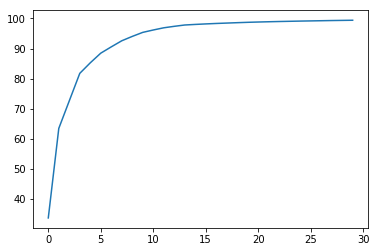

In [91]:
import matplotlib.pyplot as plt
plt.plot(var1)
plt.show()

In [92]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

10

#### 4. Wrapper Method - Extra Tree Classifier

In [93]:
finaltrainingdf.iloc[:,0:520].columns

Index(['HGoal diff +1_shotsF', 'HGoal diff +1_goalsF', 'HGoal diff +1_xGF',
       'HGoal diff +1_shotsA', 'HGoal diff +1_goalsA', 'HGoal diff +1_xGA',
       'HGoal diff +1_xGD', 'HGoal diff +1_xGF90', 'HGoal diff +1_xGA90',
       'HGoal diff +1_timeF',
       ...
       'Ateam_Crystal Palace', 'Ateam_Everton', 'Ateam_Leicester',
       'Ateam_Liverpool', 'Ateam_Man City', 'Ateam_Man United',
       'Ateam_Southampton', 'Ateam_Tottenham', 'Ateam_Watford',
       'Ateam_West Ham'],
      dtype='object', length=520)

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
print(model.feature_importances_) 

[2.10735379e-03 1.35081190e-03 1.84177246e-03 3.41288188e-03
 1.80675448e-03 1.29136618e-03 3.80692285e-03 1.61536159e-03
 2.88549303e-03 2.77962228e-04 2.33708666e-03 3.45269234e-03
 2.67273644e-03 4.63270380e-04 2.00548020e-03 3.54221346e-04
 1.69123395e-03 1.92206852e-03 8.10723165e-04 1.19292123e-03
 1.83897283e-03 1.44689267e-03 7.65435252e-03 9.45843693e-04
 2.69366259e-03 4.63350512e-03 6.94905570e-04 4.01500996e-04
 9.77255918e-04 5.55924456e-04 1.94863104e-03 5.33560566e-03
 1.60576340e-03 8.49329030e-04 3.72270841e-04 1.78474645e-03
 3.57104251e-04 9.96031317e-04 3.47452785e-04 1.05476738e-03
 1.20189141e-03 7.93691166e-04 2.20828680e-03 7.30133076e-03
 2.82312526e-03 1.33107507e-03 1.79977218e-03 1.47667434e-03
 1.02084937e-03 2.92176206e-04 1.57511929e-03 1.29522677e-03
 2.45109978e-03 1.28903479e-03 9.72867798e-04 7.09785251e-03
 1.87657249e-03 2.81068245e-03 1.25083003e-03 9.69943372e-04
 5.78601346e-04 1.10202196e-03 6.28620447e-03 1.19434572e-03
 6.61134269e-03 1.936614

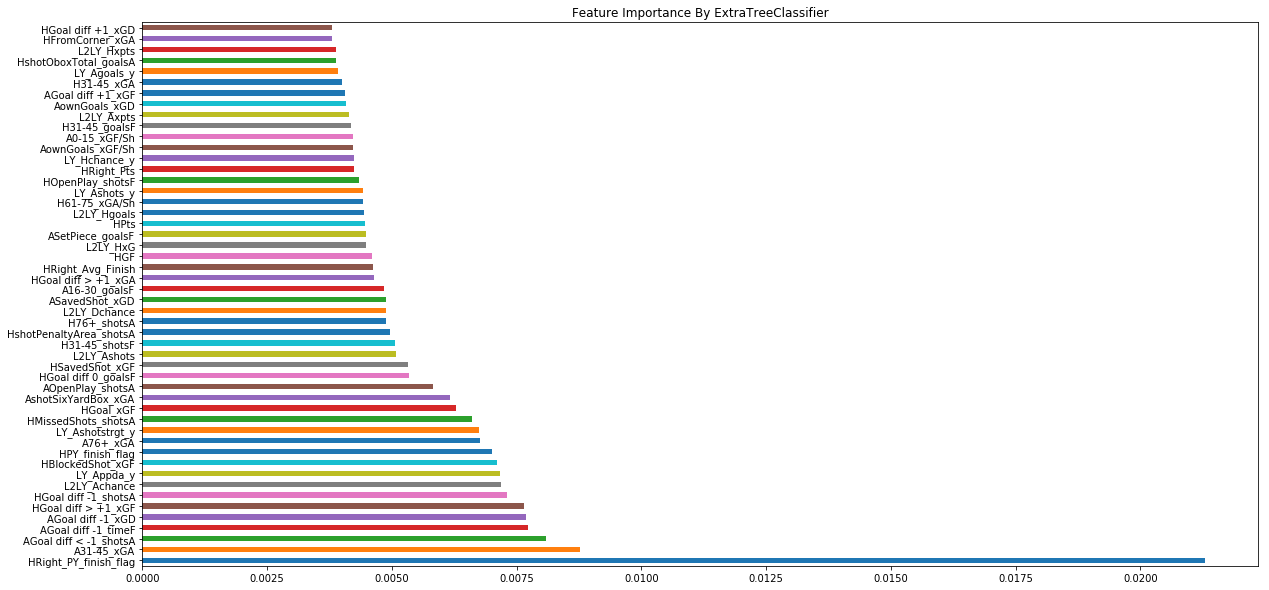

In [99]:
feat_importances = pd.Series(model.feature_importances_, index=finaltrainingdf.iloc[:,0:520].columns)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,facecolor='white')
feat_importances.nlargest(50).plot(kind='barh')
plt.title('Feature Importance By ExtraTreeClassifier')
plt.show()

In [100]:
feat_importances=pd.DataFrame(feat_importances,columns={'ImportanceScore'})

In [101]:
TopFeatures=pd.DataFrame(feat_importances[feat_importances['ImportanceScore']>=0.005].sort_values(['ImportanceScore'],ascending=False))

In [102]:
TopFeatures

,ImportanceScore
HRight_PY_finish_flag,0.021298
A31-45_xGA,0.008777
AGoal diff < -1_shotsA,0.008088
AGoal diff -1_timeF,0.007723
AGoal diff -1_xGD,0.007696
HGoal diff > +1_xGF,0.007654
HGoal diff -1_shotsA,0.007301
L2LY_Achance,0.007196
LY_Appda_y,0.007168
HBlockedShot_xGF,0.007098


In [103]:
treeimp=list(model.feature_importances_)
tree_features = pd.DataFrame(list(zip(lst,treeimp)),
              columns=['features','importances'])

### After studying the results of RFE, Correlation Stats and Extra Tree Classifer we have cut-down the dataset to 25 key features
__'H76+_shotsA', 'HPY_finish_flag', 'HMissedShots_shotsA',
'HRight_PY_finish_flag', 'LY_Hdeep_y', 'LY_AxG_y', 'HOpenPlay_goalsF',
'A76+_shotsA', 'HshotOboxTotal_xGA', 'HRight_Pts', 'LY_HxG_y',
'H76+_xGD', 'HGoal diff -1_xGA', 'AshotSixYardBox_shotsA',
'ASavedShot_shotsA', 'L2LY_Hppda', 'HshotSixYardBox_xGA',
'H46-60_shotsA', 'HMissedShots_xGA', 'L2LY_Axpts', 'HshotOboxTotal_xGF',
'L2LY_Hshotstrgt', 'AFromCorner_xGA', 'AGoal diff +1_shotsF',
'HGoal_shotsF', 'A31-45_shotsF', 'L2LY_Dchance', 'LY_Hgoals_y',
'HBlockedShot_shotsF', 'HFromCorner_xGD', 'HRight_Avg_Finish',
'L2LY_Achance', 'AGoal diff -1_timeF', 'AMissedShots_xGD',
'HSetPiece_shotsF'__

![EPL_Soccer](Feature_Selection.png)